In [1]:
"""
2 # 간단한 모델 생성

데이터 로드 및 전처리
"""

#trensorflow 모듈 import
import tensorflow as tf

In [2]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


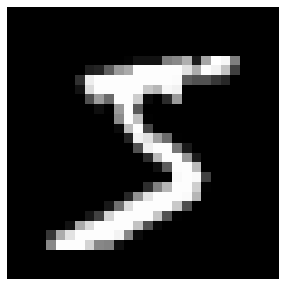

In [3]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize = (5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()
    
plot_image(x_train, 0)

In [4]:
"""
훈련 셋과 검증 셋의 이미지 픽셀을 나타내는 값의 최소값, 최대값 확인
"""
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
"""
딥러닝 모델의 안정적인 학습을 위해서 입력 이미지 픽셀 값을 정규화 변환한다
이미지 픽셀 값을 최대값 255로 나누어 주면 0~1 범위로 스케일이 정규화
"""
# 정규화 (Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
"""
mnist 데이터셋은 색상을 나타내는 채널이 1개이다. CNN모델에 주입하기 위해서는 
색상을 나타내는 채널을 추가해 준다
다음 코드는 tf.newaxis 축을 텐서 배열에 직접 추가하는 방식
따라서 (60000,28, 28) 형태의 텐서가 (60000,28, 28, 1) 형태로 변환
"""
#채널 추가 
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
"""
### Sequential API로 모델 생성 및 학습

Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 생성

최종 분류기로 Dense 레이어를 적용하기 위해, Flatten 층을 추가하여 1차원 배열로 펼쳐준다
합성곱은 Conv2D 레이어를 사용하고(3, 3) 크기의 서로 다른 32가지 종류의 커널을 적용한다
ReLU 활성화 함수를 적용한다. name속성에 레이어의 이름은 'conv'라고 지정

풀링 레이어는(2, 2) 크기로 최대 풀링(max pooling)을 적용하고, 레이어 이름 속성도 추가해준다
최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수를 10으로 하고
분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax 적용
"""
#Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    #Convolution 적용(32 필터)
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1) ,name ="conv"),
    #Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name="pool"),
    
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax"),
])



In [8]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
정의한 모델 구조에 옵티마이저, 손실함수, 평가지표를 설정해 주고 컴파일하면 모델 인스턴스가 생성
fit() 메소드에 훈련 셋과 검증 셋을 주입하고, epoch를 10으로 지정
"""
# 모델 컴파일
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [10]:
# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2139 - accuracy: 0.9397 - val_loss: 0.0905 - val_accuracy: 0.9715
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0806 - accuracy: 0.9766 - val_loss: 0.0619 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9822 - val_loss: 0.0611 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.0557 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0429 - accuracy: 0.9873 - val_loss: 0.0562 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.0562 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0528 - val_accuracy

In [11]:
"""
evaluate()메소드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여
손실과 평가지표를 계산
"""
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0547 - accuracy: 0.9836


[0.054728101938962936, 0.9836000204086304]

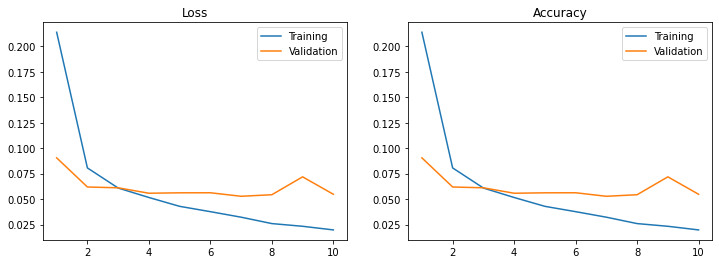

In [12]:
"""
모델 훈련 단계에서 훈련 결과를 history 객체에 저장해 두었다
10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의하고 실행
그래프를 보면 훈련 셋에 대한 손실은 계속 줄어드는데 
검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않는다.
모델이 과적합으로 진행되었다는 것을 파악할 수 있다
"""
def plot_loss_acc(history, epoch):
    
    loss, val_loss = history.history["loss"], history.history["val_loss"]
    acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].plot(range(1, epoch +1), loss, label="Training")
    axes[0].plot(range(1, epoch +1), val_loss, label="Validation")
    axes[0].legend(loc="best")
    axes[0].set_title("Loss")
    
    axes[1].plot(range(1, epoch +1), loss, label="Training")
    axes[1].plot(range(1, epoch +1), val_loss, label="Validation")
    axes[1].legend(loc="best")
    axes[1].set_title("Accuracy")
    
    plt.show()
plot_loss_acc(history, 10)

In [13]:
"""
#모델 구조 파악
즉, 이미지를 입력받아 특징을 추출하고 이미지가 나타내는 숫자를 예측할 수 있다
"""
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
"""
생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있다
입력 텐서는 (None, 28, 28, 1)형태인데, 가장 앞에 있는 축(axis = 0)의 None 값은 
배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능하다는 의미
"""
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [15]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [16]:
#레이어
model.layers

In [17]:
"""
모델 레이어의 인덱싱
"""
# 첫 번째 레이어 선택
model.layers[0]

In [18]:
"""
각 레이어에 입력되는 텐서를 따로 선택하는 것도 가능
앞의 Conv2D 레이어에는 모델 입력 데이터가 그대로 들어가기 때문에 (None, 28, 28, 1)형태
"""
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [19]:
"""
레이어 출력도 확인 가능
"""
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [20]:
"""
각 레이어의 가중치 행렬을 추출할 수 있다
weights 속성을 각 레이어 인스턴스에 적용하면 된다

"""
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.00929475e+00, -8.03060353e-01,  1.83768764e-01,
           -8.37378353e-02, -1.58654362e-01, -8.35157037e-01,
            3.53081197e-01,  5.69516905e-02,  1.40678525e-01,
           -3.86334002e-01,  4.80747633e-02, -1.18425168e-01,
           -9.28918600e-01, -7.82569945e-01, -4.35625583e-01,
            3.25846314e-01,  6.01838470e-01,  3.24839503e-01,
            1.20918021e-01,  1.14796840e-01,  5.51862657e-01,
           -8.70760009e-02,  2.56367087e-01, -2.22061947e-01,
            2.27648348e-01, -3.22003454e-01,  1.82236061e-01,
            2.48326555e-01, -3.55266035e-01,  2.92568445e-01,
           -7.43591011e-01, -4.16104589e-03]],
 
         [[-1.92516707e-02, -7.43229866e-01, -1.74576268e-02,
            1.83062658e-01,  4.37800497e-01, -8.93882127e-04,
            1.26738384e-01,  4.78476584e-01,  2.14606777e-01,
           -3.90419930e-01, -2.19247609e-01,  1.19025856e-01,
           

In [21]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.00929475e+00, -8.03060353e-01,  1.83768764e-01,
          -8.37378353e-02, -1.58654362e-01, -8.35157037e-01,
           3.53081197e-01,  5.69516905e-02,  1.40678525e-01,
          -3.86334002e-01,  4.80747633e-02, -1.18425168e-01,
          -9.28918600e-01, -7.82569945e-01, -4.35625583e-01,
           3.25846314e-01,  6.01838470e-01,  3.24839503e-01,
           1.20918021e-01,  1.14796840e-01,  5.51862657e-01,
          -8.70760009e-02,  2.56367087e-01, -2.22061947e-01,
           2.27648348e-01, -3.22003454e-01,  1.82236061e-01,
           2.48326555e-01, -3.55266035e-01,  2.92568445e-01,
          -7.43591011e-01, -4.16104589e-03]],

        [[-1.92516707e-02, -7.43229866e-01, -1.74576268e-02,
           1.83062658e-01,  4.37800497e-01, -8.93882127e-04,
           1.26738384e-01,  4.78476584e-01,  2.14606777e-01,
          -3.90419930e-01, -2.19247609e-01,  1.19025856e-01,
          -7.59764254e-01, -

In [22]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.11752956, -0.0174316 , -0.06516407, -0.11506494,  0.00527779,
       -0.17218116, -0.2174509 , -0.10934965, -0.3132674 , -0.02959723,
       -0.18431796, -0.30477065, -0.01654174, -0.26121813, -0.23380339,
       -0.32690307, -0.0330766 , -0.2255296 , -0.01071703, -0.19820794,
        0.23594151,  0.        , -0.32493743, -0.17496644, -0.11713144,
       -0.06834374, -0.06922571, -0.26382425, -0.33509701, -0.3121563 ,
       -0.15310852, -0.23093288], dtype=float32)>

In [23]:
"""
레이어의 이름(name 속성)을 사용하여 해당 레이어를 선택할 수 있다
모델을 정의할 때 Conv2D 합성곱 레이어의 이름을 "conv" 라고 지정해 두었기 때문에 
다음과 같이 추출 가능하다
"""
# 레이어 이름 사용하여 레이어 선택
model.get_layer("conv")

In [26]:
"""
모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 
갖는 activator 모델을 정의한다. 첫 번쨰 샘플에 대하여 각 레이어의 출력을 예측
"""
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                          outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...] )
len(activations)

2

In [28]:
"""
2개의 출력 텐서 중에서 첫 번째 텐서는 Conv2D 레이어의 출력이다 
텐서의 형태는 (1, 26, 26, 32)인데 
여기서 1은 입력 이미지의 개수를 나타낸다
샘플이 1개라는 뜻
"""
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

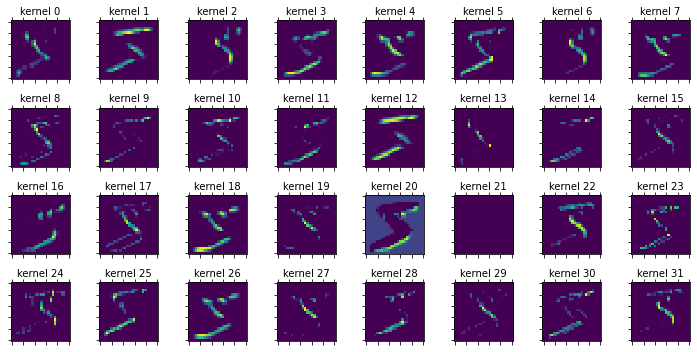

In [30]:
"""
첫 번쨰 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화하면
다음과 같다

출력 이미지의 특징이 조금씩 차이가 있는 것을 볼 수 있다 
이처럼 각 커널은 입력 이미지로 부터 서로 다른 피처(특징)을 추출하는 역할
"""
# Contolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i // 8, i %8].matshow(conv_activation[0, :, :, i], cmap="viridis")
    axes[i //8, i % 8].set_title("kernel %s" %str(i), fontsize=10)
    plt.setp(axes[i //8, i %8].get_xticklabels(), visible=False)
    plt.setp(axes[i //8, i %8].get_yticklabels(), visible=False)
    
plt.tight_layout()
plt.show()

In [31]:
"""
두 번째 레이어는 최대 풀링 레이어이다 
여기서 출력하는 텐서는 (1, 13, 13, 32)형태를 갖는다
"""
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


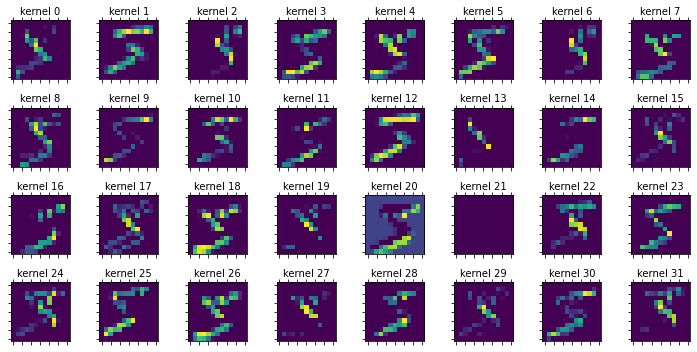

In [32]:
"""
각 커널별로 출력되는 특성맵 이미지를 시각화하면, 앞서 Conv2D 출력 이미지에 비하여 
화소 크기가 굵어진 것을 볼 수 있다. 
최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서
특징을 더욱 강하게 드러낼 수 있다.
"""
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i // 8, i %8].matshow(pooling_activation[0, :, :, i], cmap="viridis")
    axes[i //8, i % 8].set_title("kernel %s" %str(i), fontsize=10)
    plt.setp(axes[i //8, i %8].get_xticklabels(), visible=False)
    plt.setp(axes[i //8, i %8].get_yticklabels(), visible=False)
    
plt.tight_layout()
plt.show()